In [1]:
from glob import glob
import os

import cv2
import numpy as np
from PIL import Image
from pdf2image import convert_from_path
from imutils import resize
from tqdm import tqdm

from border_and_title import is_number
from scoring import *

# f = "../../data/original/Good/300-014834.pdf"
# f = "../../data/original/Good/300-014823.pdf"
f = "../../data/original/Ugly/2.pdf"


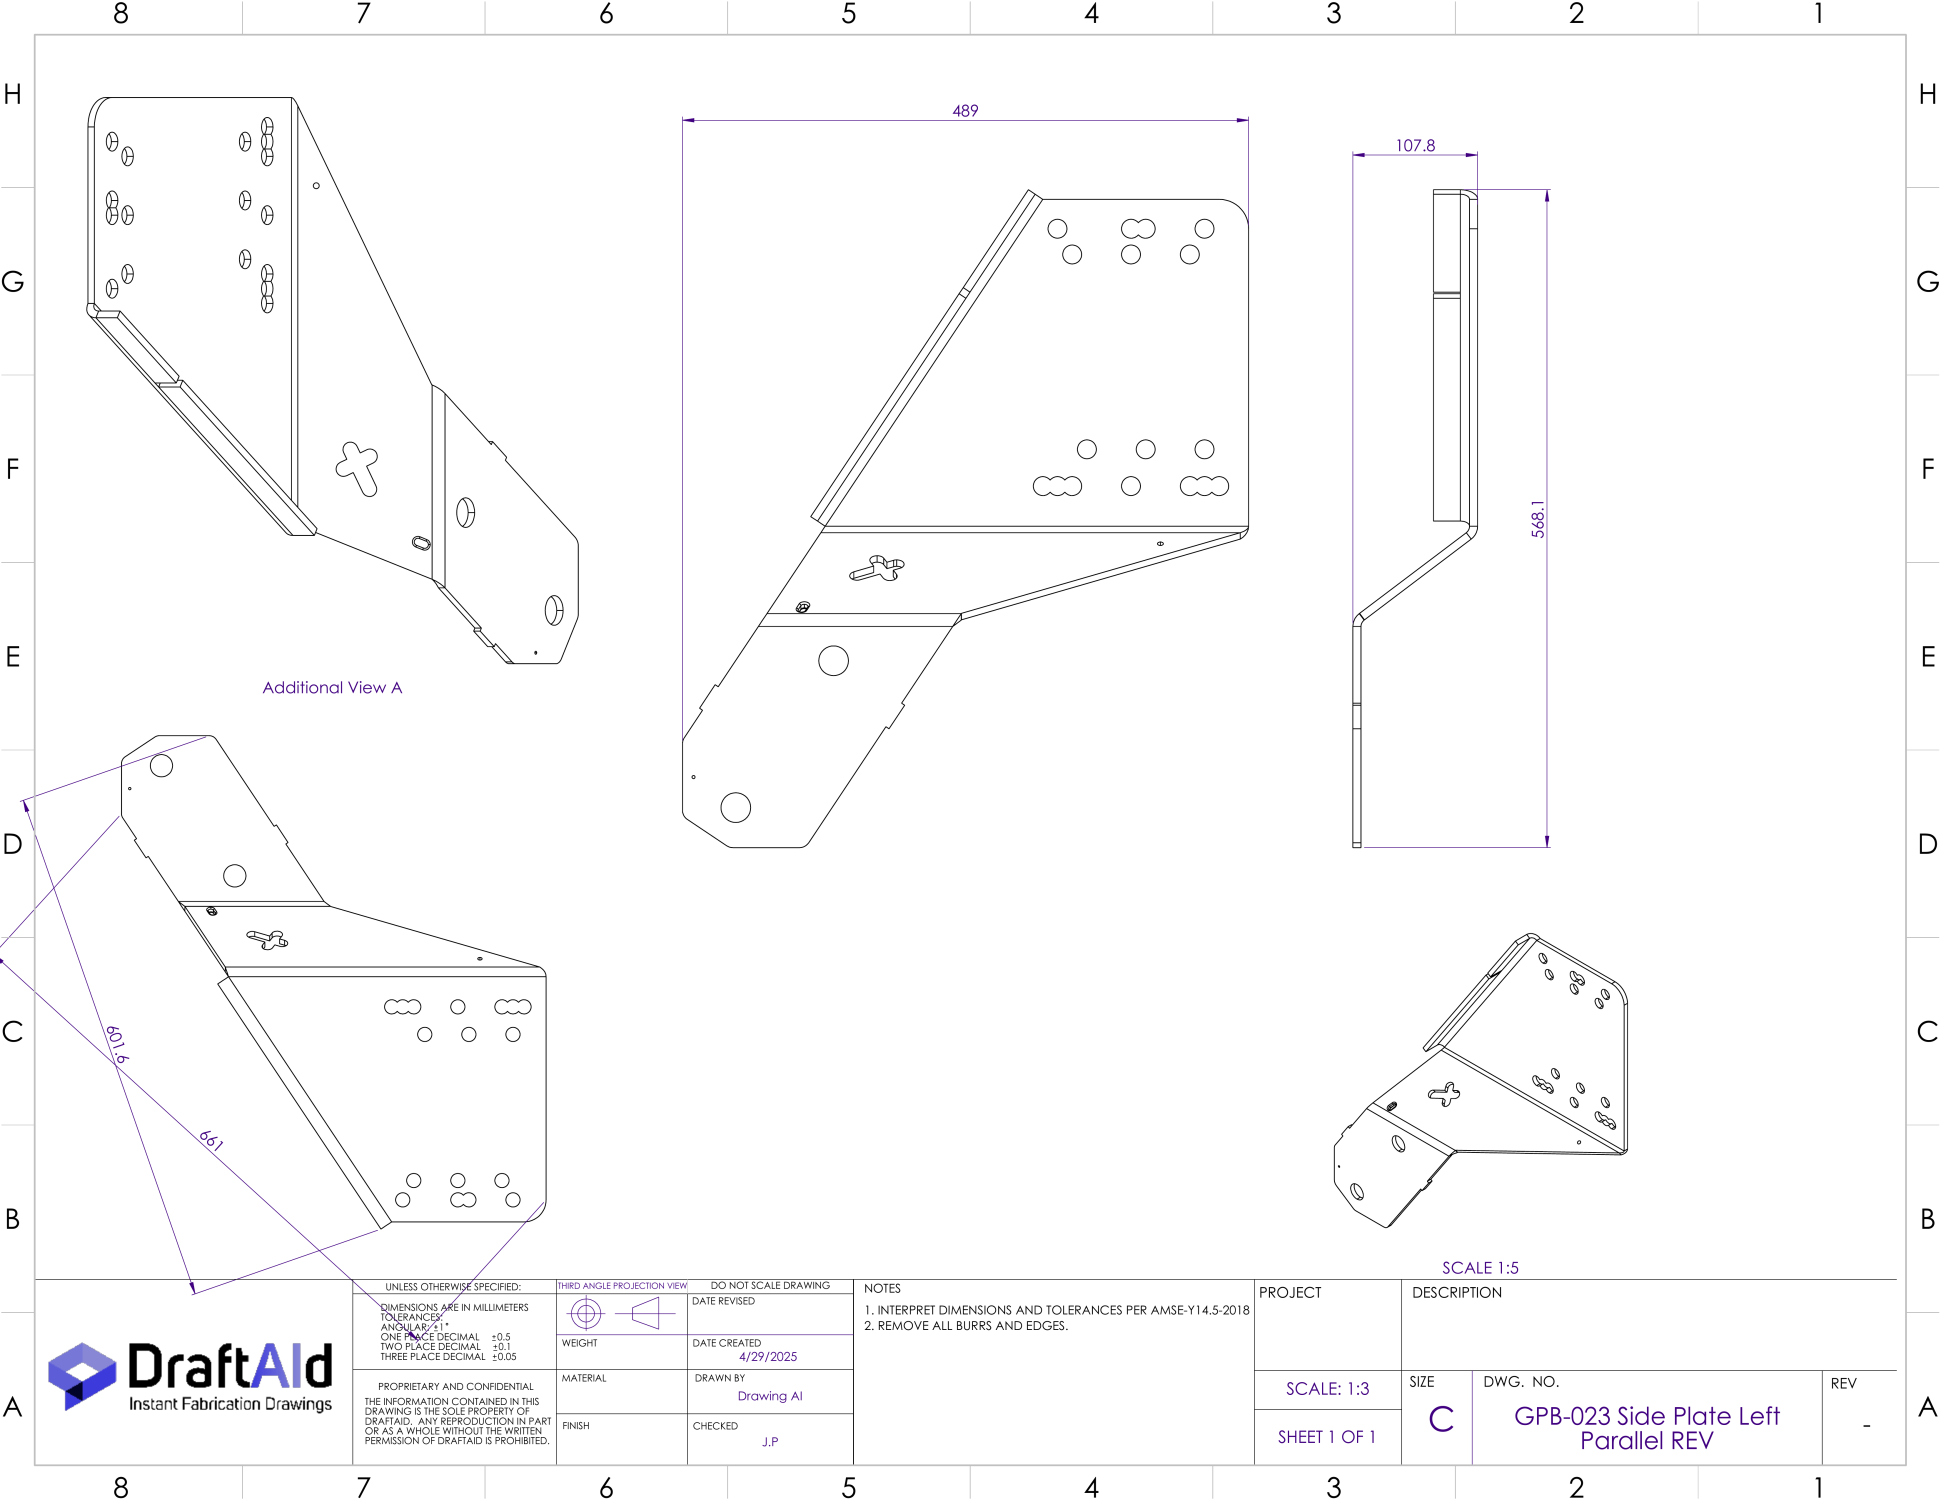

In [2]:
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
color = (255, 0, 0)
thickness = 2

pages = convert_from_path(f, dpi=300)
img = np.array(pages[0])
img = im_resize(img)
img_comp = img.copy()

Image.fromarray(img_comp)

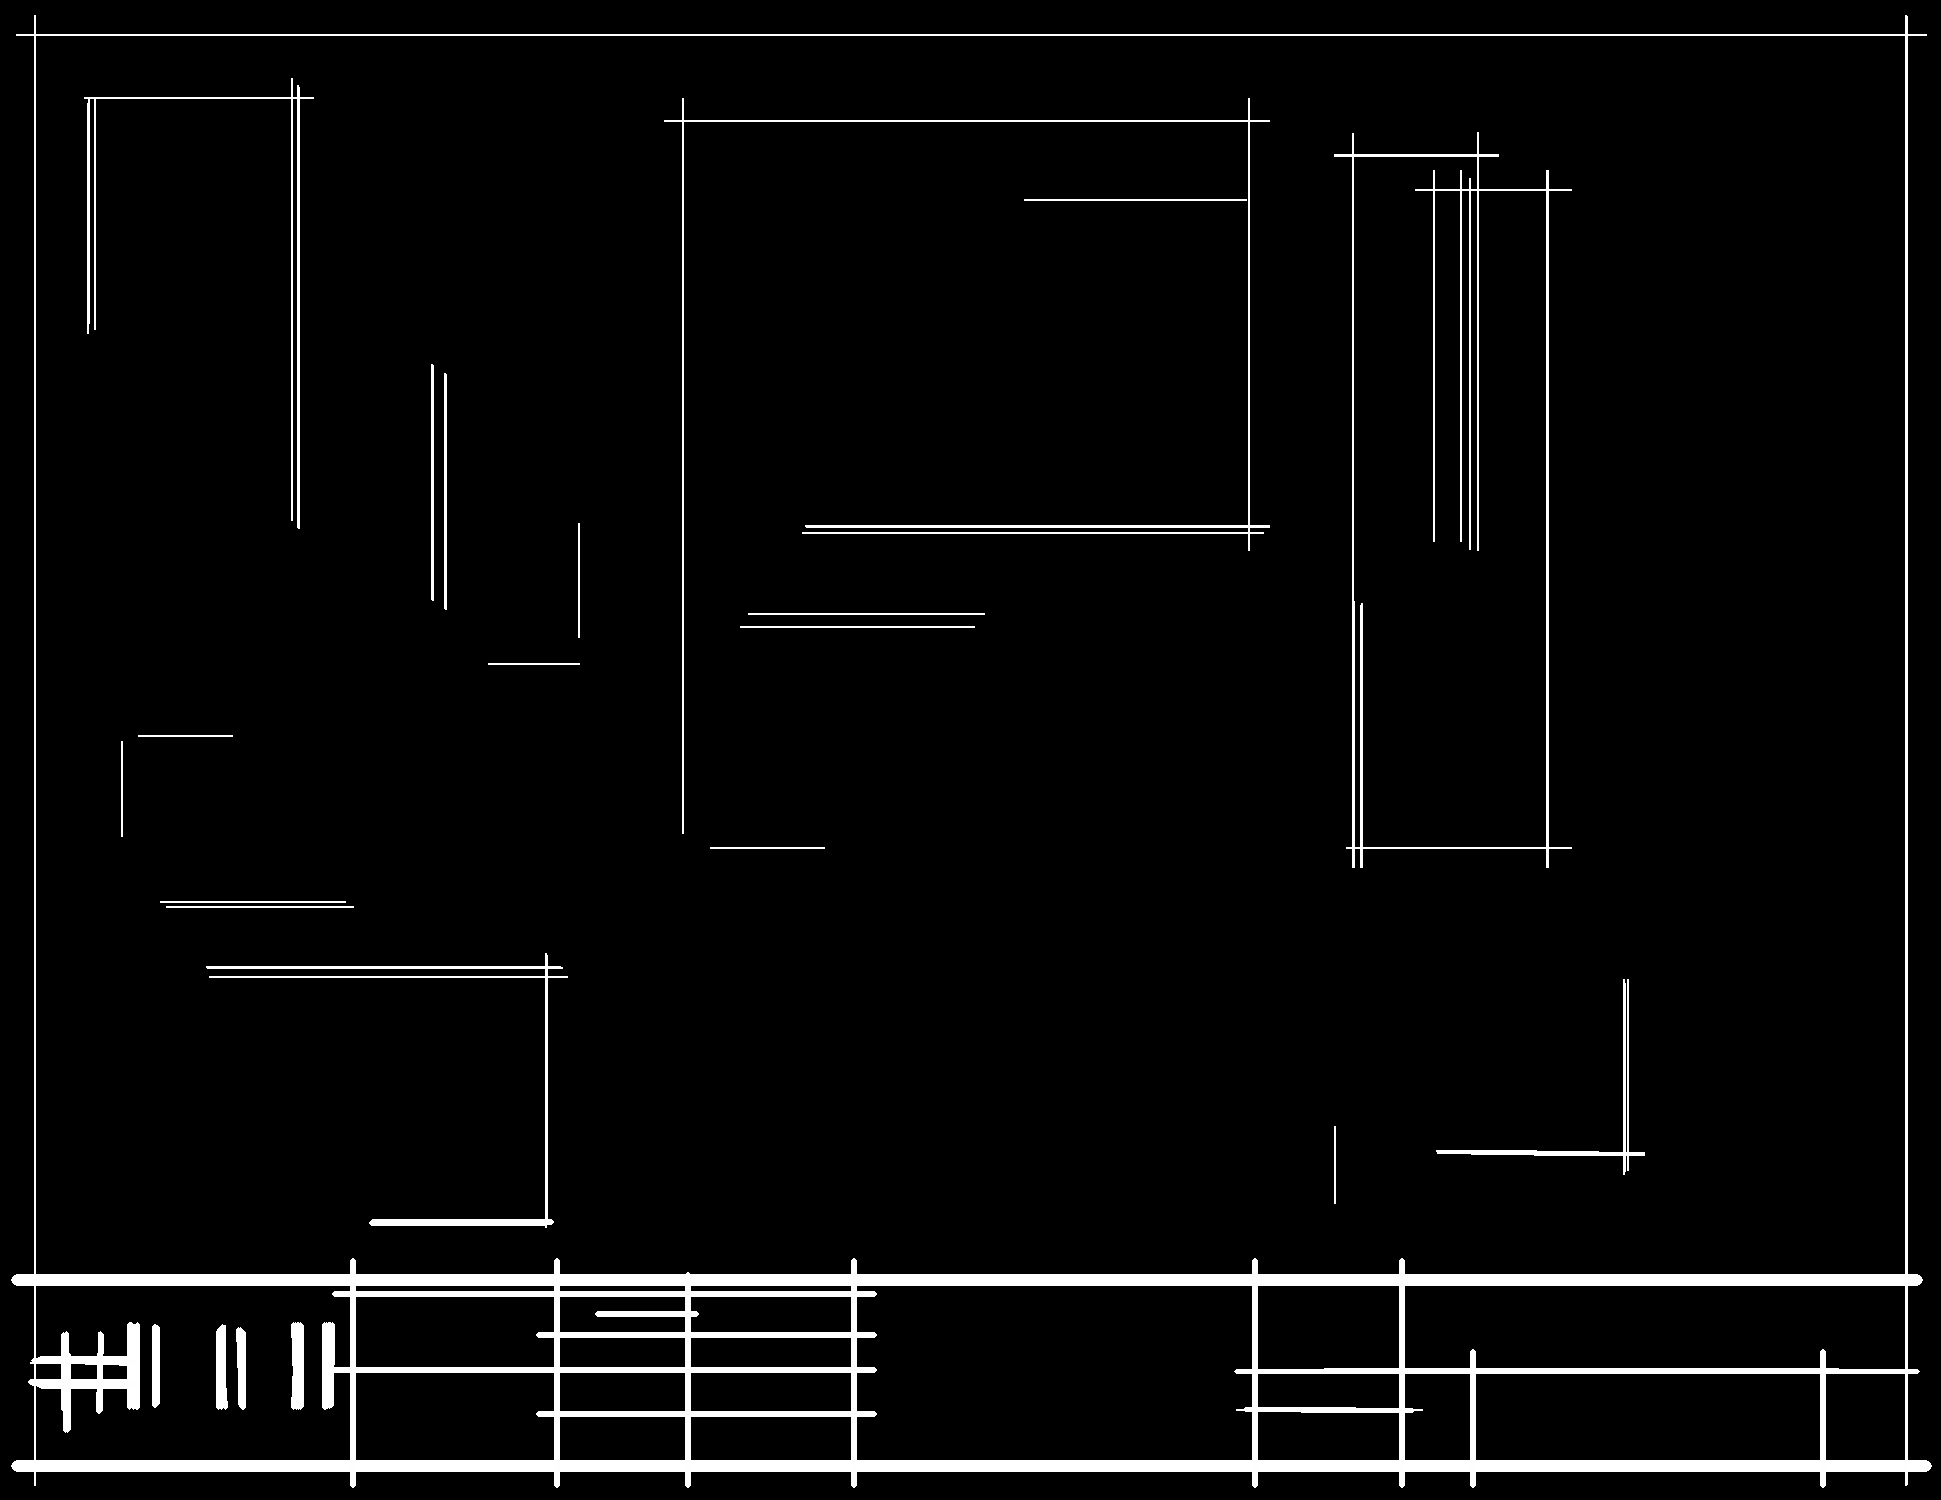

In [3]:
mask = cv2.imread("../../data/output-2.jpg")
Image.fromarray(mask)

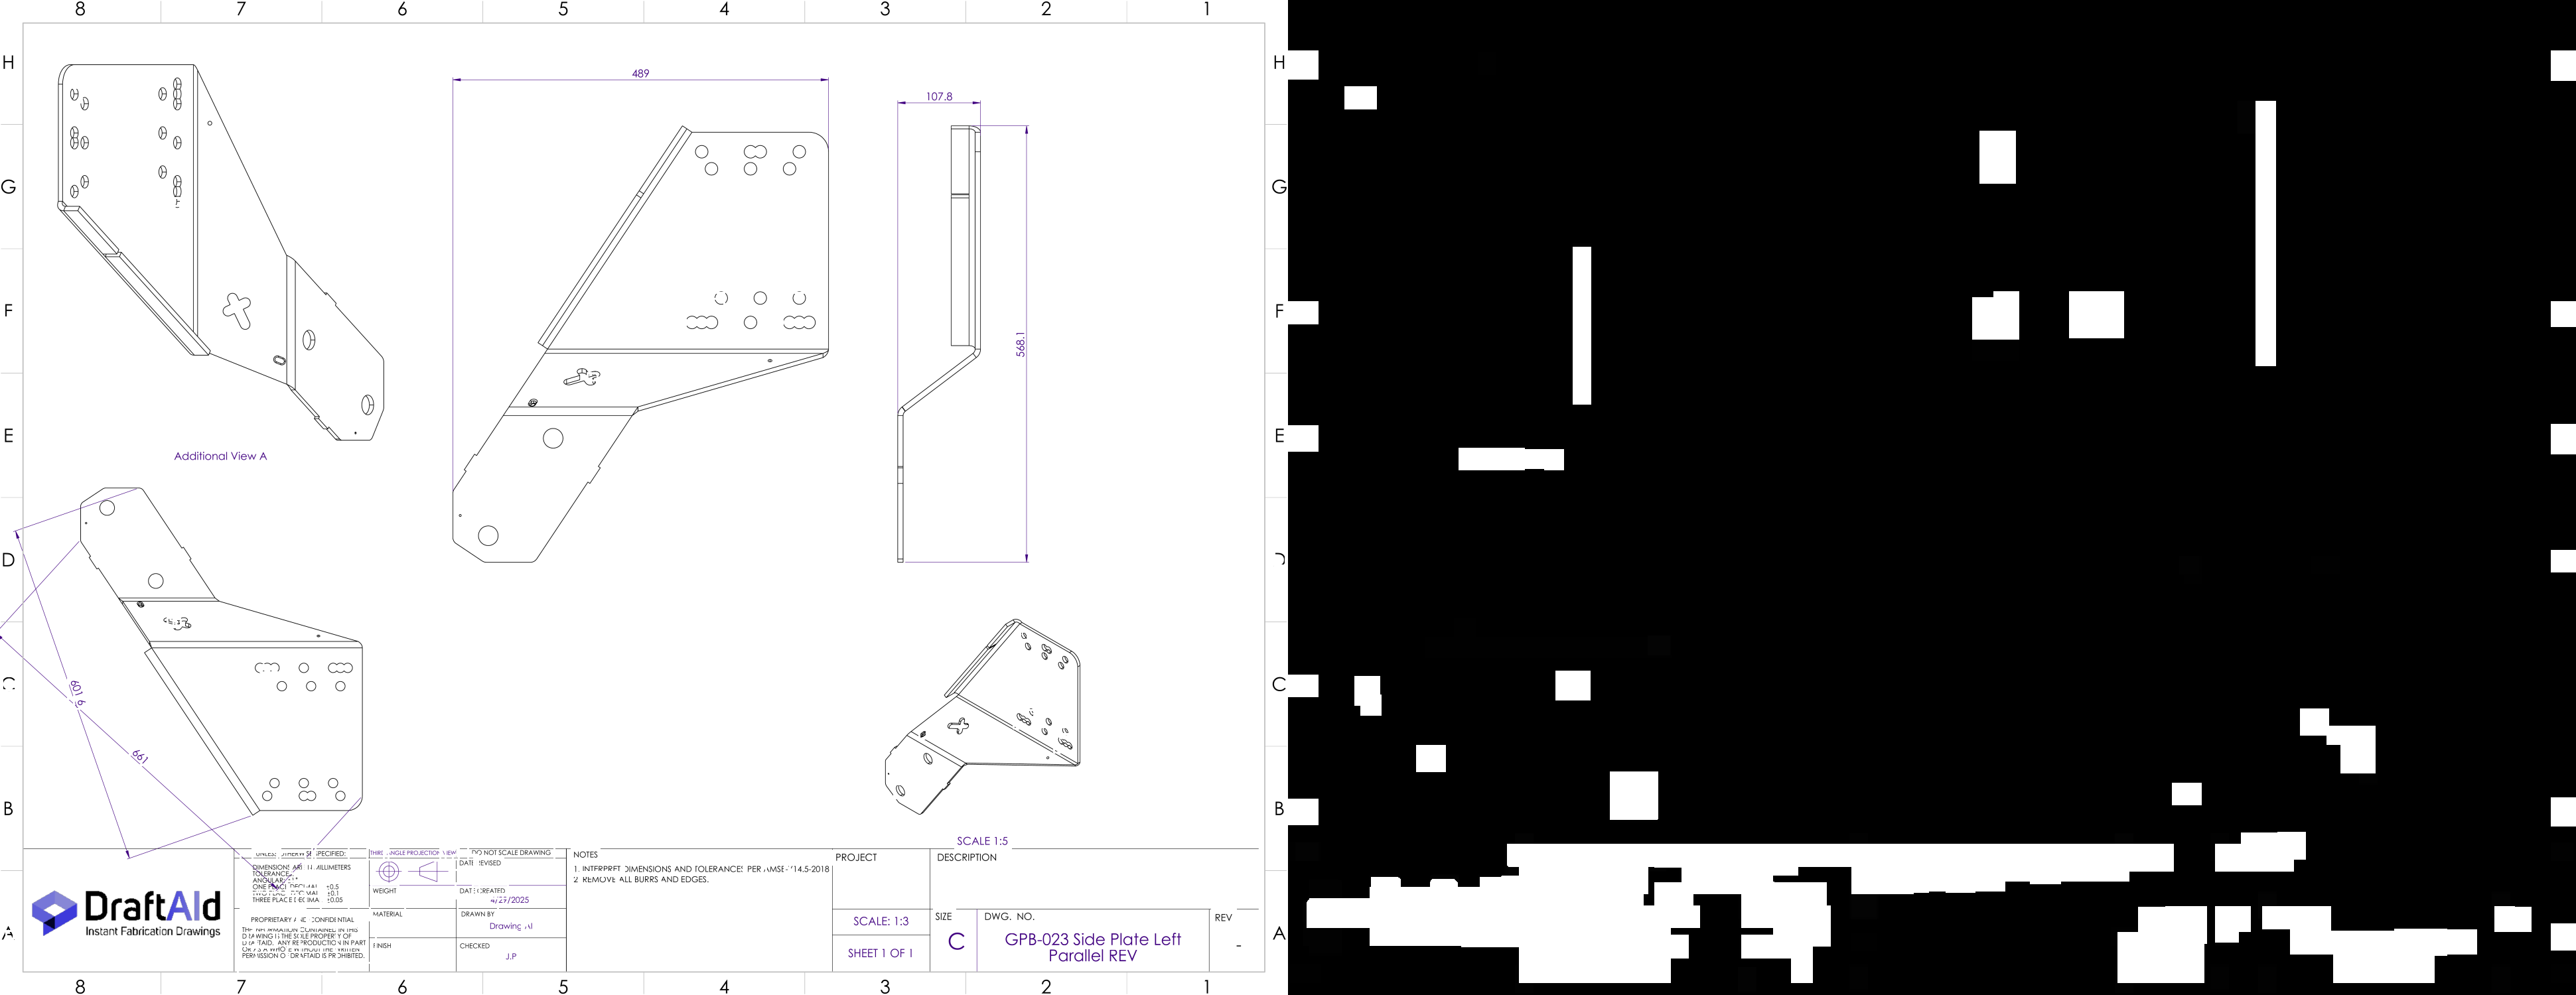

In [4]:
from doctr.models import ocr_predictor


img_comp = img.copy()
mask_comp = mask.copy()
# mask_comp = np.zeros_like(img_comp)
ocr_model = ocr_predictor('db_resnet50', 'crnn_vgg16_bn', pretrained=True)
ocr_result = ocr_model([img_comp])
h, w, _ = mask_comp.shape

for block in ocr_result.pages[0].blocks:
    for line in block.lines:
        for word in line.words:
            (x_min, y_min), (x_max, y_max) = word.geometry
            x_min = int(x_min * w)
            y_min = int(y_min * h)
            x_max = int(x_max * w)
            y_max = int(y_max * h)

            if not is_number(word.value):
                cv2.rectangle(mask_comp, (x_min, y_min), (x_max, y_max), (255, 255, 255), cv2.FILLED)
                cv2.rectangle(img_comp, (x_min, y_min), (x_max, y_max), (255, 255, 255), thickness)

mask_comp = cv2.dilate(mask_comp, np.ones((5, 5), np.uint8), iterations=5)
mask_comp = cv2.erode(mask_comp, np.ones((8, 8), np.uint8), iterations=5)
mask_comp = cv2.dilate(mask_comp, np.ones((10, 10), np.uint8), iterations=3)
Image.fromarray(np.hstack((img_comp, mask_comp)))

30


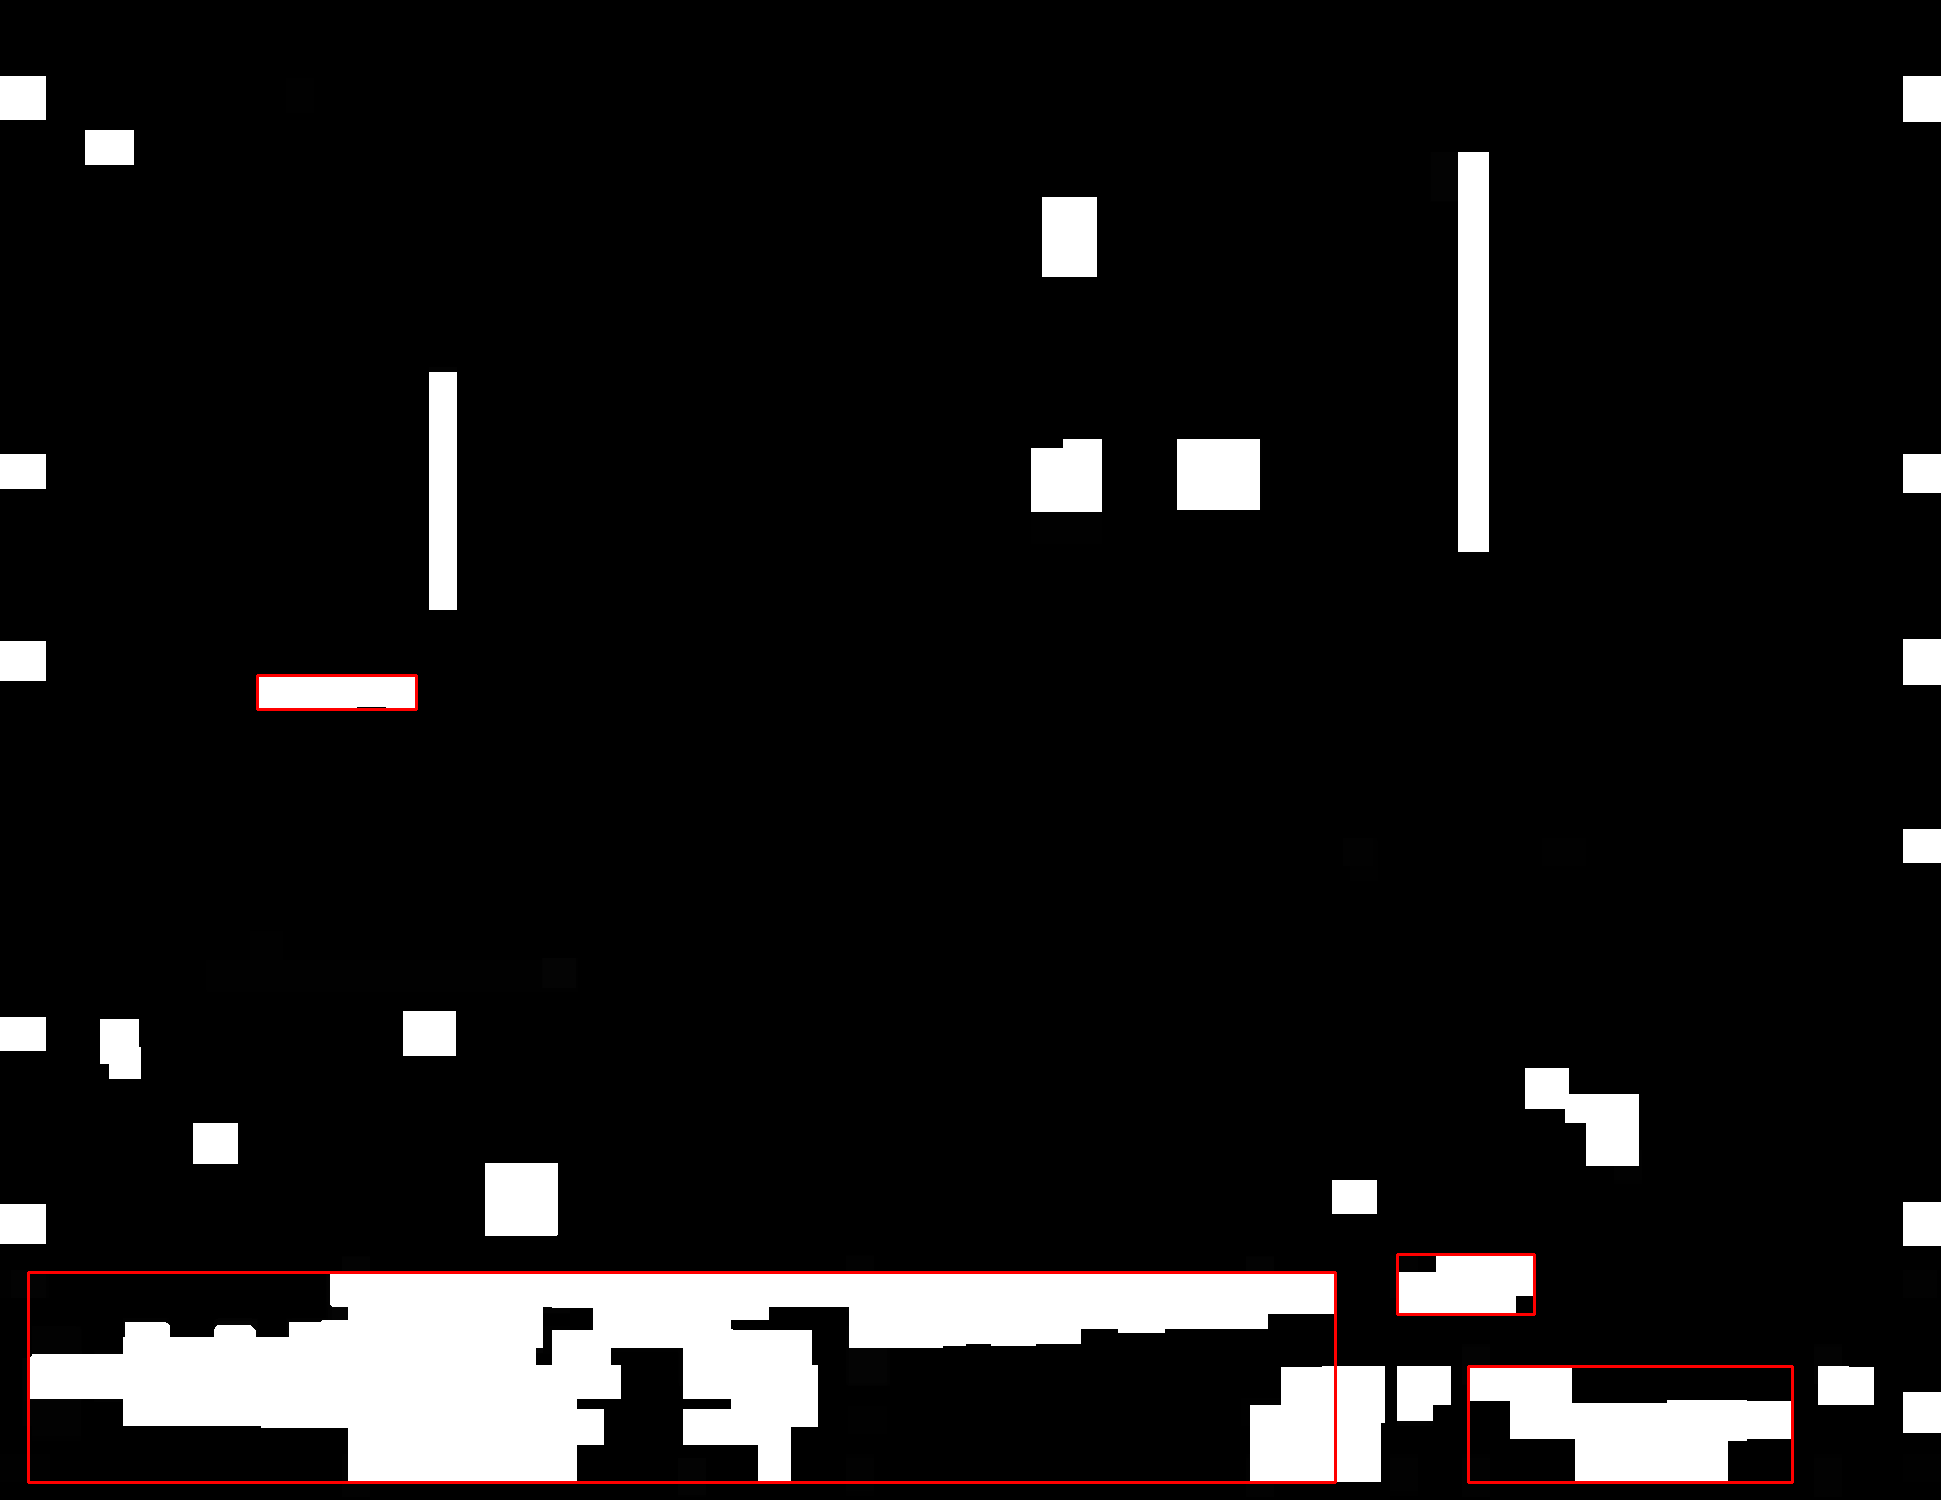

In [5]:
gray = cv2.cvtColor(mask_comp, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
img_comp = mask_comp.copy()

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w / float(h)
    area = w * h

    if area > 5000 and (1.3 < aspect_ratio < 10):
        cv2.rectangle(img_comp, (x, y), (x + w, y + h), (255, 0, 0), 2)

Image.fromarray(img_comp)

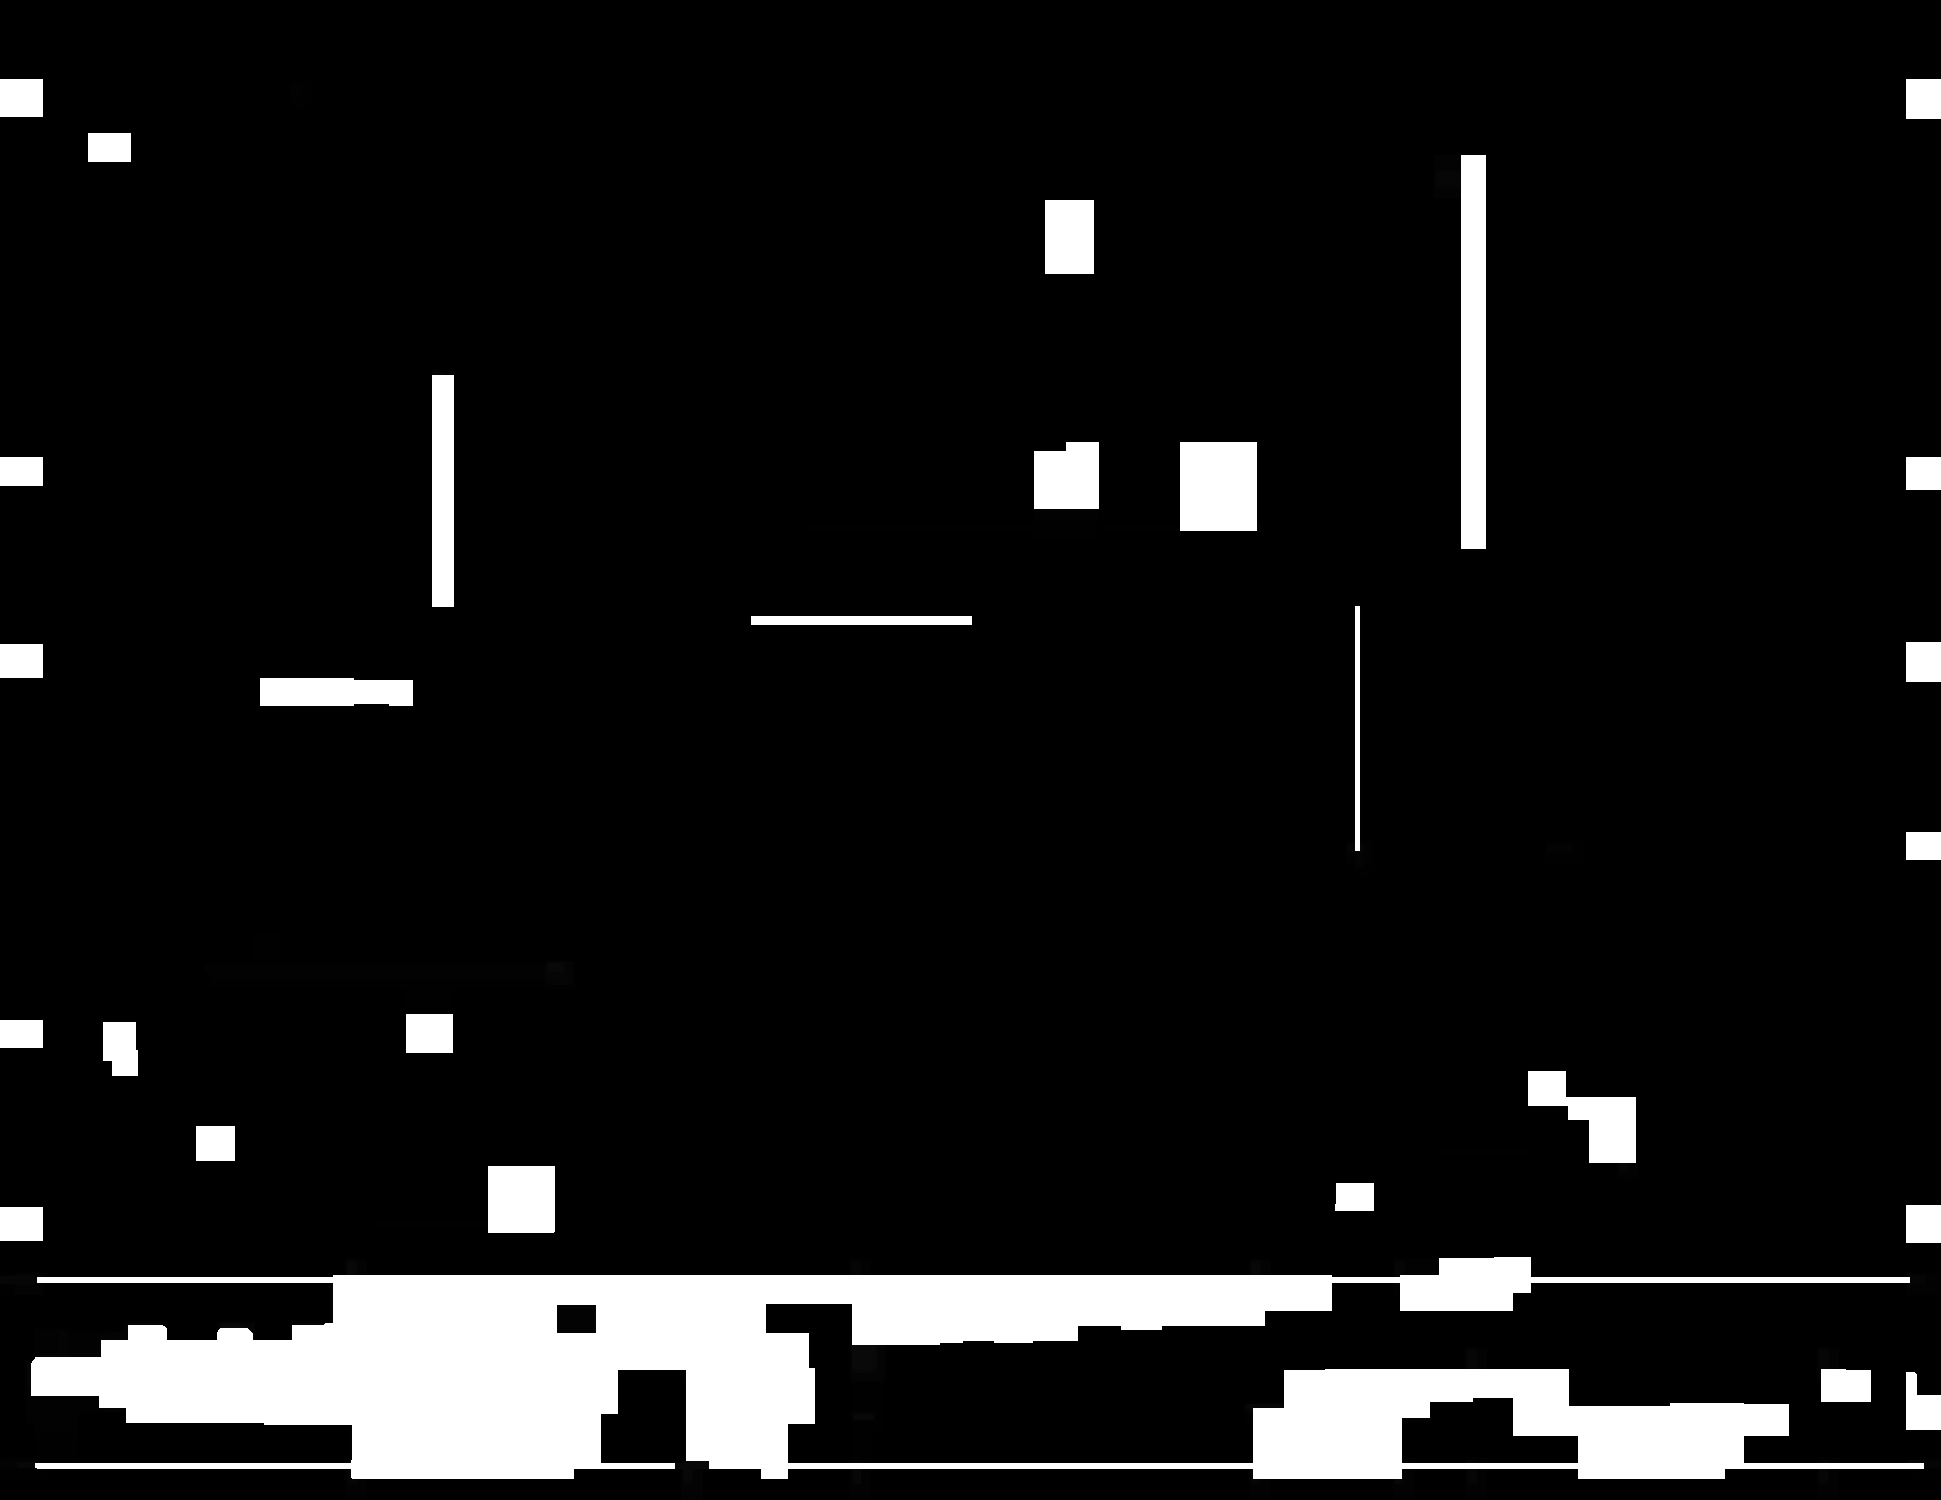

In [6]:
mask_comp_1 = mask.copy()

mask_comp_1 = mask_comp + mask_comp_1
mask_comp_1 = cv2.dilate(mask_comp_1, np.ones((5, 5), np.uint8), iterations=5)
mask_comp_1 = cv2.erode(mask_comp_1, np.ones((7, 7), np.uint8), iterations=5)
mask_comp_1 = cv2.dilate(mask_comp_1, np.ones((5, 5), np.uint8), iterations=1)

Image.fromarray(mask_comp_1)

28


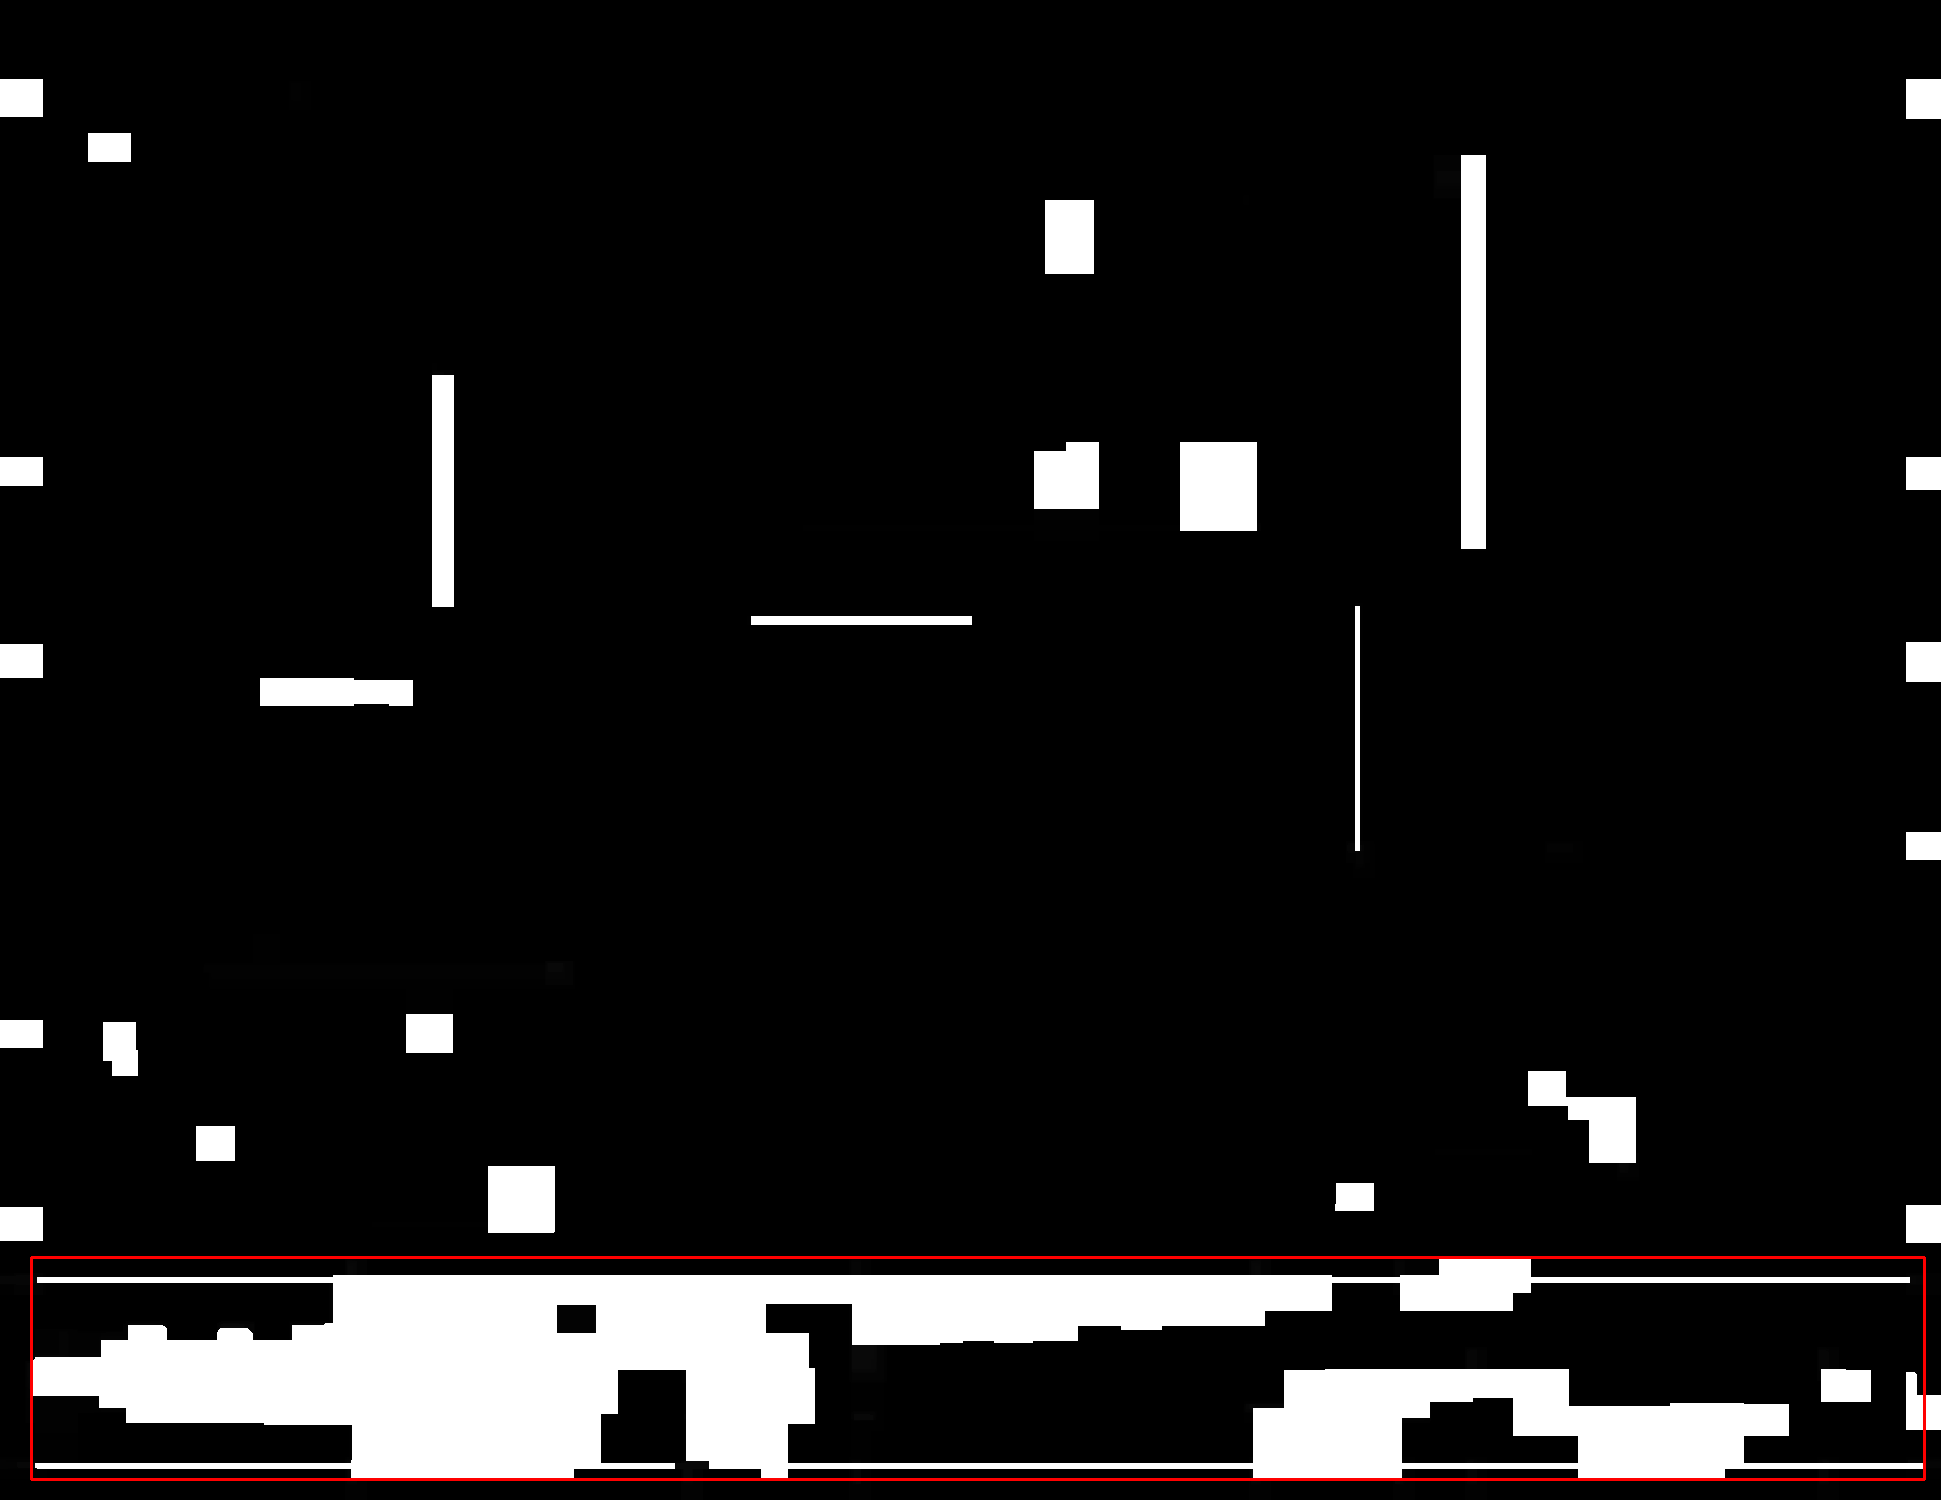

In [7]:
gray = cv2.cvtColor(mask_comp_1, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
img_comp = mask_comp_1.copy()

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w / float(h)
    area = w * h

    if area > 5000 and (1.3 < aspect_ratio < 10):
        cv2.rectangle(img_comp, (x, y), (x + w, y + h), (255, 0, 0), 2)

Image.fromarray(img_comp)